In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import time as tm
from keras import layers
from scipy.integrate import odeint
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.fft import fft, fftfreq
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Import preprocessed voltage signal

In [38]:
base_data_path = 'mnist_base.csv'
base_data_df = pd.read_csv(base_data_path)
base_data = base_data_df.to_numpy()
preprocessed_path = 'normalized_training_nh.csv'
preprocessed = pd.read_csv(preprocessed_path, header = None).to_numpy()

base_shape = (28,28)
pp_shape = (20,22)
num_examples = base_data.shape[0]


data_labels = base_data[:, 0]
base_data = base_data[:, 1:]

print("Original training data: " + str(base_data.shape))
print(base_data)
print("Training labels: " + str(data_labels.shape))
print(data_labels)
print("Preprocessed data: " + str(preprocessed.shape))
print(preprocessed)

Original training data: (70000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Training labels: (70000,)
[1 0 1 ... 3 9 2]
Preprocessed data: (42000, 440)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


3


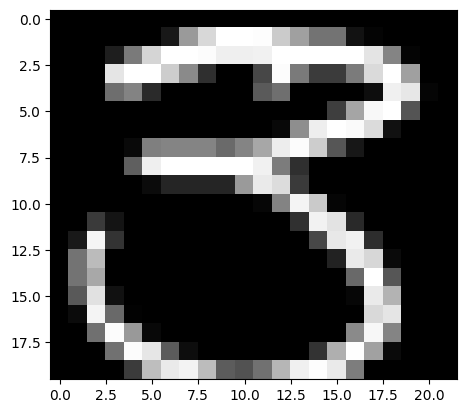

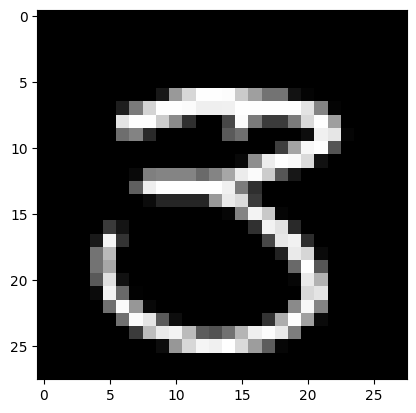

In [39]:
idx = 7

print(data_labels[idx])
plt.imshow(preprocessed[idx,:].reshape(pp_shape), cmap = 'Greys_r')
plt.show()
plt.imshow(base_data[idx,:].reshape(base_shape), cmap = 'Greys_r')
plt.show()

In [40]:
base_data[idx,:]/255

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

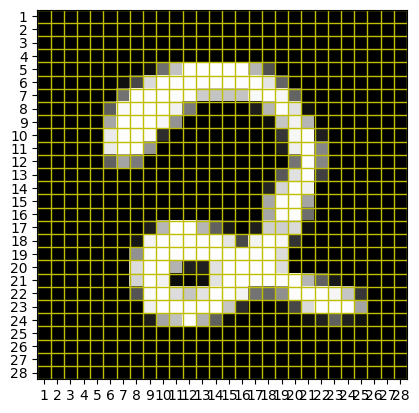

In [41]:
plt.figure()
idx = 97
im = plt.imshow(base_data[idx,:].reshape(base_shape)/255,
                interpolation='none', vmin=0, vmax=1, aspect='equal', cmap = 'Greys_r')
# im = plt.imshow(preprocessed[idx,:].reshape(pp_shape)/255,
#                 interpolation='none', vmin=0, vmax=1, aspect='equal', cmap = 'Greys_r')

ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 28, 1))
ax.set_yticks(np.arange(0, 28, 1))

# Labels for major ticks
ax.set_xticklabels(np.arange(1, 29, 1))
ax.set_yticklabels(np.arange(1, 29, 1))

# Minor ticks
ax.set_xticks(np.arange(-.5, 28, 1), minor=True)
ax.set_yticks(np.arange(-.5, 28, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='y', linestyle='-', linewidth=1)

# Remove minor ticks
ax.tick_params(which='minor', bottom=False, left=False)

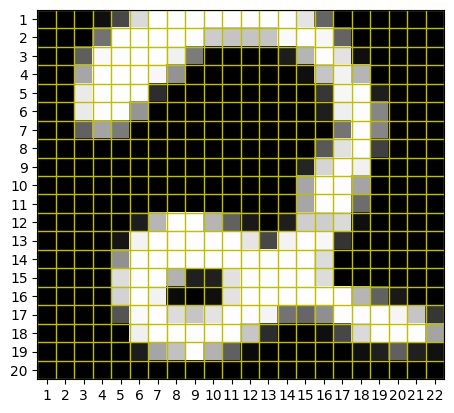

In [42]:
plt.figure()
im = plt.imshow(preprocessed[idx,:].reshape(pp_shape),
                interpolation='none', vmin=0, vmax=1, aspect='equal', cmap = 'Greys_r')
# im = plt.imshow(preprocessed[idx,:].reshape(pp_shape)/255,
#                 interpolation='none', vmin=0, vmax=1, aspect='equal', cmap = 'Greys_r')

ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 22, 1))
ax.set_yticks(np.arange(0, 20, 1))

# Labels for major ticks
ax.set_xticklabels(np.arange(1, 23, 1))
ax.set_yticklabels(np.arange(1, 21, 1))

# Minor ticks
ax.set_xticks(np.arange(-.5, 22, 1), minor=True)
ax.set_yticks(np.arange(-.5, 20, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='y', linestyle='-', linewidth=1)

# Remove minor ticks
ax.tick_params(which='minor', bottom=False, left=False)

In [43]:
sample_input = preprocessed[idx, :]
sample_label = data_labels[idx]
modulation = sample_input * 0.15 + 0.6
modulation_c = np.repeat(modulation, 1000)
modulated_input = modulation_c*sine_wave
masked_input = modulated_input * mask_c

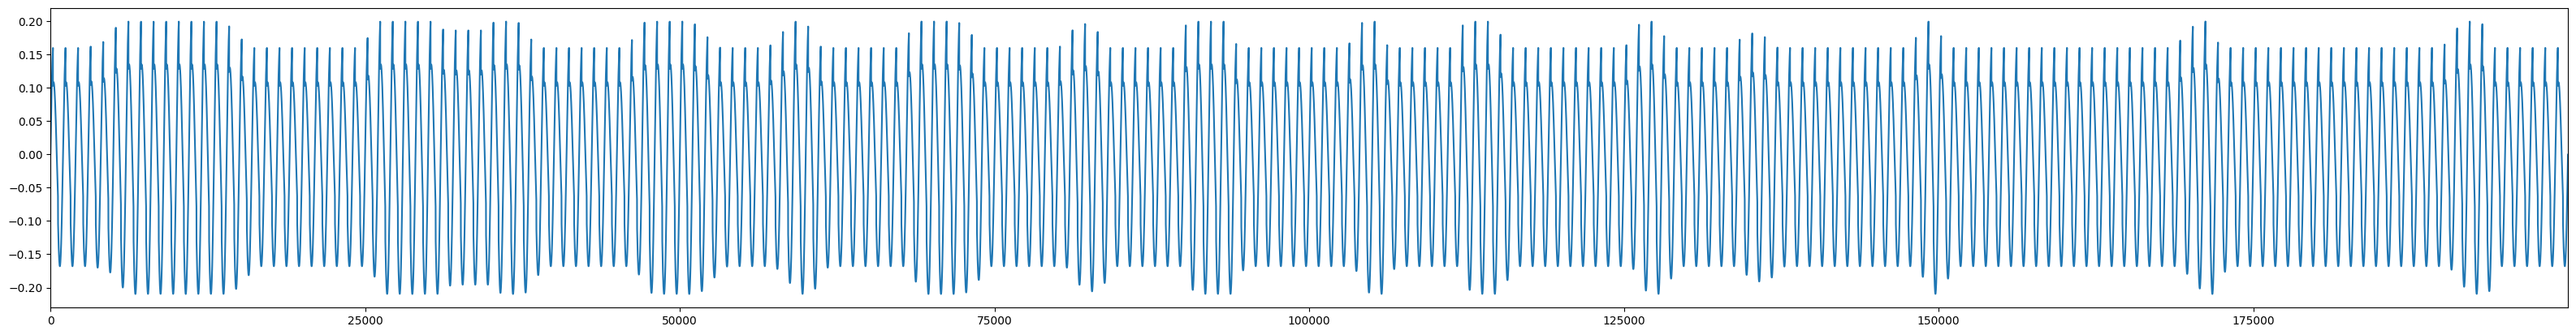

In [76]:
plt.figure().set_figwidth(40)
plt.margins(x = 0)
#plt.plot(modulated_input[:330000])
plt.plot(masked_input[:200000])
plt.show()

## Differential equation

$x'' + 2\zeta w_nx' + w_n^2x + \beta x^3 = F(t) = \alpha u(t)$

In [8]:
# Constants

sine_amp = 0.4
num_features = 440
sine_freq = 30e3
separation_time = 1/sine_freq
a = 970.870/5
b = 9.4259e9
c = 4.25e20
alpha = 44.478*70
total_samples = 440000
num_examples = 70000

# Initial conditions
x0 = 0.0
v0 = 0.0
initial_state = [x0, v0]

time_points = np.linspace(0, num_features * separation_time, num_features * 1000)
sine_wave = sine_amp*np.sin(2 * np.pi * sine_freq * time_points)
mask_values = np.asarray([0.70, 0.45, 0.45, 0.70, 0.70])
mask_d = np.tile(mask_values, (440, 1))
mask_c = np.repeat(mask_d, 1000/5)

In [33]:
def F(t):
    return alpha * (masked_input[(int((t/(separation_time*num_features)) * total_samples))%total_samples])**2

In [34]:
def ODE(xv, t, a, b, c, alpha):
    x, v = xv
    dxdt = v
    dvdt = -a*v - b*x - c*x**3 + F(t)
    return [dxdt, dvdt]

In [35]:
outputs = np.zeros((28000, 2200))
curr = 0
batch_size = 1000
for b in range(num_examples//batch_size):
    start = tm.time()
    for idx in range(b*batch_size, (b+1)*batch_size):
        sample_input = preprocessed[idx, :]
        sample_label = data_labels[idx]
        modulation = sample_input * 0.15 + 0.6
        modulation_c = np.repeat(modulation, 1000)
        modulated_input = modulation_c*sine_wave
        masked_input = modulated_input * mask_c
        result = np.array(odeint(ODE, initial_state, time_points, args = (a, b, c, alpha))[:, 0])  
        outputs[idx, :] = result[::200]
        curr = curr+1
        end = tm.time()
        print(f"Solved {idx+1}/{num_examples} in {end-start : .4f} second")
        start = end
    print("Saving checkpoint to CSV...")
    df = pd.DataFrame(outputs)
    df.to_csv("mems_outputs_acttest_5_70.csv", index = None)       

Solved 1/70000 in  1.0782 second
Solved 2/70000 in  1.0766 second
Solved 3/70000 in  0.9947 second


KeyboardInterrupt: 

3


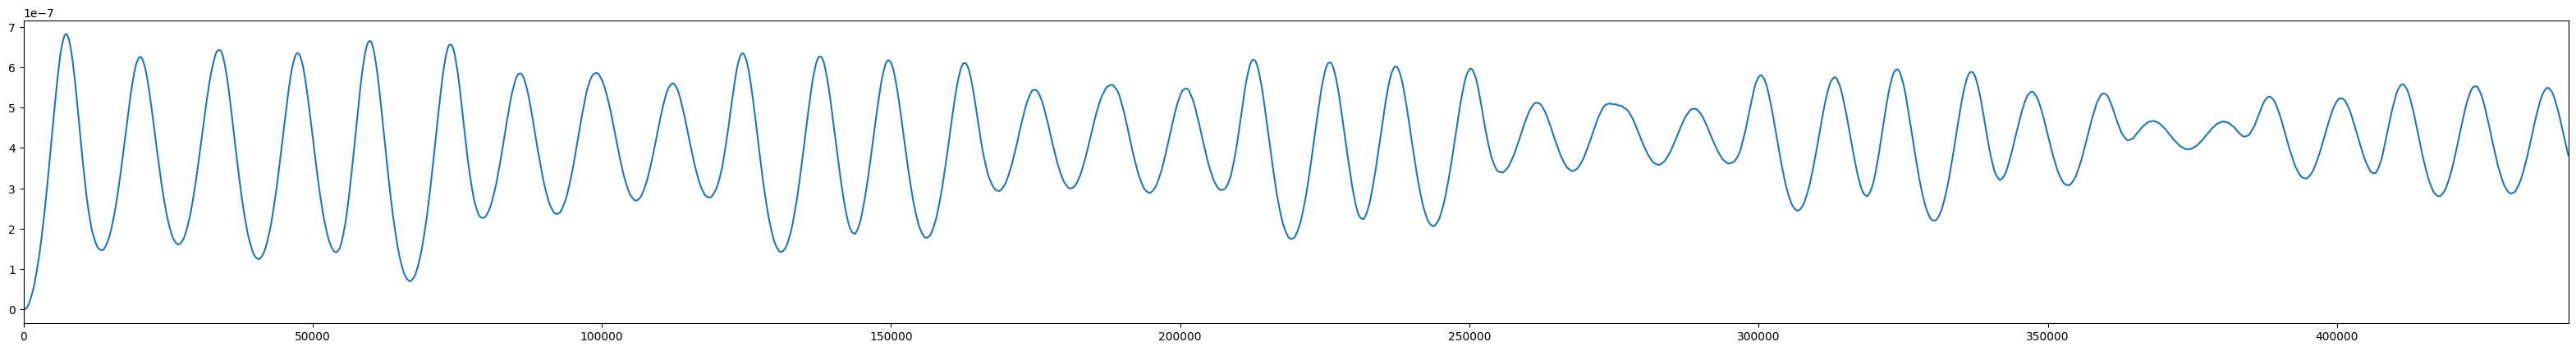

In [78]:
plt.figure().set_figwidth(40)
plt.margins(x = 0)
plt.plot(result)
print(data_labels[7])

In [25]:
mems_output = pd.read_csv('mems_output.csv', index_col = None, header = None).to_numpy()

KeyboardInterrupt: 

In [23]:
mems_output.shape

(69999, 2200)